In [1]:
# Initial imports
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn import tree

In [2]:
# Loading data
file_path = Path("../Data/AdultCensusUpdated.csv")
adult_df = pd.read_csv(file_path)
adult_df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,State
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,Arkansas
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,Maryland
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,Michigan
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,Idaho
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,Florida


In [3]:
#drop and clean up data 
adult_df = adult_df.drop(columns =["education", "capital.gain", "capital.loss", "native.country"])
adult_df = adult_df.replace("?", np.nan)
adult_df = adult_df.dropna()
adult_df.head()



,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,State
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K,Maryland
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K,Idaho
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K,Florida
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,45,<=50K,Florida
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,40,<=50K,California


In [4]:
# Map values to binary encoding for specified columns
binary_encoding = {
    "income": {"<=50K": 0, ">50K": 1},
    "sex": {"Male": 0, "Female": 1}
}

# Apply mapping to each specified column
for column, mapping in binary_encoding.items():
    adult_df[column] = adult_df[column].map(mapping)

adult_df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,State
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,1,18,0,Maryland
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,1,40,0,Idaho
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,1,40,0,Florida
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,1,45,0,Florida
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,0,40,0,California


In [5]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to each non-numeric column
for col in adult_df.select_dtypes(include=["object"]).columns:
    adult_df[col] = label_encoder.fit_transform(adult_df[col].astype(str))
adult_df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,State
1,82,2,132870,9,6,3,1,4,1,18,0,19
3,54,2,140359,4,0,6,4,4,1,40,0,11
4,41,2,264663,10,5,9,3,4,1,40,0,8
5,34,2,216864,9,0,7,4,4,1,45,0,8
6,38,2,150601,6,5,0,4,4,0,40,0,4


In [6]:
# Define features set
X = adult_df.copy()
X.drop("income", axis=1, inplace=True)
X.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,State
1,82,2,132870,9,6,3,1,4,1,18,19
3,54,2,140359,4,0,6,4,4,1,40,11
4,41,2,264663,10,5,9,3,4,1,40,8
5,34,2,216864,9,0,7,4,4,1,45,8
6,38,2,150601,6,5,0,4,4,0,40,4


In [7]:
# Define target vector
y = adult_df["income"].values.reshape(-1, 1)
y[:5]



array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Creating StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [10]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [11]:
#fitting the DT_model

In [12]:
# Creating the decision tree classifier instance
census_model = tree.DecisionTreeClassifier()
# Fitting the model
census_model = census_model.fit(X_train_scaled, y_train)

In [13]:
# Making predictions using the testing data
predictions = census_model.predict(X_test_scaled)

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4875,877
Actual 1,859,1069


Accuracy Score : 0.7739583333333333
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5752
           1       0.55      0.55      0.55      1928

    accuracy                           0.77      7680
   macro avg       0.70      0.70      0.70      7680
weighted avg       0.77      0.77      0.77      7680



### Export Classification Report

In [16]:
import csv

def classificationReportToPanda(report, model):
    file = f'../Data/classification_report_{model}.csv'
    df = pd.DataFrame(report).transpose()
    df['model'] = model
    df['model'] = df['model'].astype('string')
    df['support'] = df['support'].astype('int64')    
    df.to_csv(file, index_label='class', quoting=csv.QUOTE_ALL)
    display(df)

report = classification_report(y_test, predictions, output_dict=True)

classificationReportToPanda(report, 'DecisionTree')

,precision,recall,f1-score,support,model
0,0.850192,0.847531,0.848859,5752,DecisionTree
1,0.549332,0.554461,0.551884,1928,DecisionTree
accuracy,0.773958,0.773958,0.773958,0,DecisionTree
macro avg,0.699762,0.700996,0.700372,7680,DecisionTree
weighted avg,0.774663,0.773958,0.774306,7680,DecisionTree


### Analyze Feature Importance

In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = census_model.feature_importances_
# We can sort the features by their importance
sorted(zip(census_model.feature_importances_, X.columns), reverse=True)

[(0.2097329060629169, 'relationship'),
 (0.18301499783686392, 'fnlwgt'),
 (0.13530216759660563, 'education.num'),
 (0.13401946350961938, 'State'),
 (0.12698238385337238, 'age'),
 (0.07336005449954247, 'hours.per.week'),
 (0.0698751606283975, 'occupation'),
 (0.04006337753099865, 'workclass'),
 (0.014429995570224424, 'race'),
 (0.007691721448757392, 'marital.status'),
 (0.005527771462701379, 'sex')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

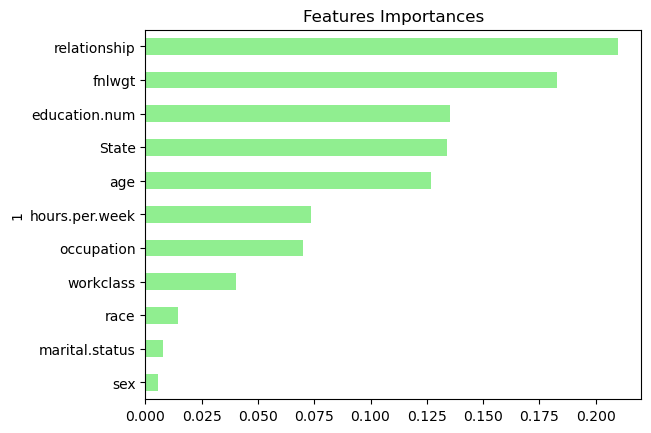

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(census_model.feature_importances_, X.columns), reverse=True))

importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

# importances_df
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)